In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
data1=pd.read_csv("Data_Regression.csv",sep=',')

In [3]:
data1.head(5)

,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [4]:
data1.tail(5)

,X,Y
31,1125,1175
32,700,1300
33,900,1250
34,900,1300
35,850,1200


In [5]:
data1.describe()

,X,Y
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
X    36 non-null int64
Y    36 non-null int64
dtypes: int64(2)
memory usage: 656.0 bytes


In [7]:
data1.shape

(36, 2)

In [8]:
type(data1)

pandas.core.frame.DataFrame

In [9]:
data1.isnull().sum()

X    0
Y    0
dtype: int64

In [10]:
data2=data1.sort_values(by=['X'])

In [11]:
reg=linear_model.LinearRegression()

In [12]:
reg.fit(data1.iloc[:,[0]], data1.iloc[:,[1]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
data1_y_pred = reg.predict(data1.iloc[:,[0]])

In [14]:
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(data1.iloc[:,[1]], data1_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data1.iloc[:,[1]], data1_y_pred))
print("Mean squared error: %.10f"%mean_squared_error(data1.iloc[:,[1]], data1_y_pred))

Coefficients: 
 [[ 0.37315794]]
Mean squared error: 11558.29
Variance score: 0.23
Mean squared error: 11558.2918431483


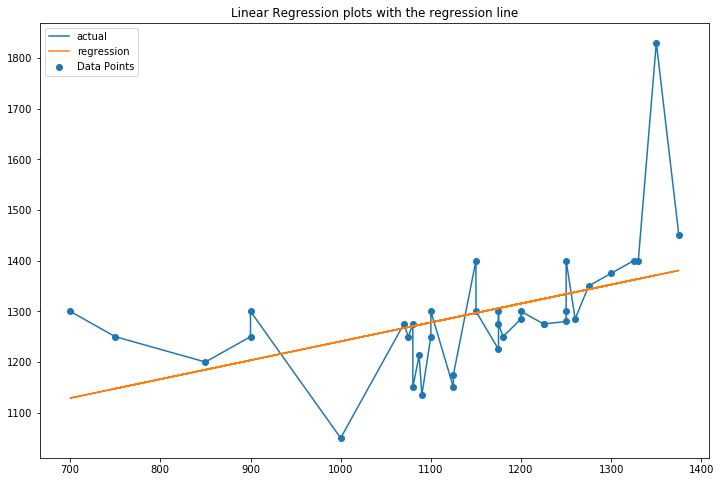

In [15]:
plt.scatter(data1.iloc[:,0], data1.iloc[:,1],label="Data Points")
plt.plot(data2.iloc[:,0], data2.iloc[:,1], label = "actual")
plt.plot(data1.iloc[:,0], data1_y_pred,label="regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()
plt.show()

In [16]:
reg1=sm.OLS(data1.iloc[:,1],sm.add_constant(data1.iloc[:,0]))

In [17]:
result=reg1.fit()

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Sat, 29 Sep 2018   Prob (F-statistic):            0.00327
Time:                        14:32:17   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        867.6042    135.071      6.423      0.000     593.107    1142.102
X              0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
stats.shapiro(result.resid)

(0.8389727473258972, 0.00010717472468968481)

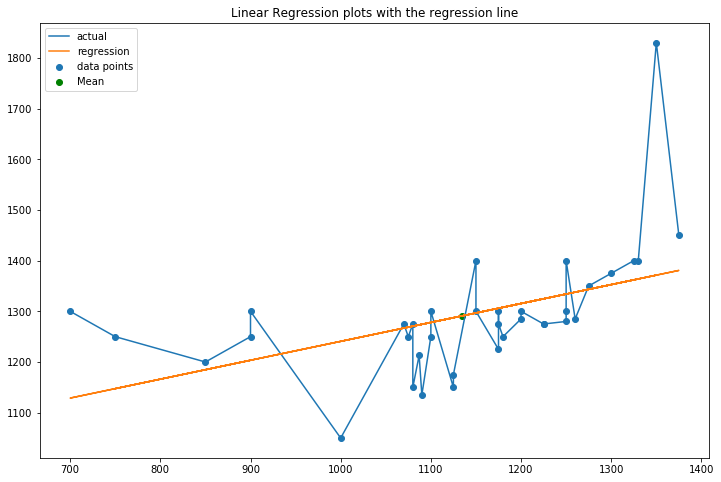

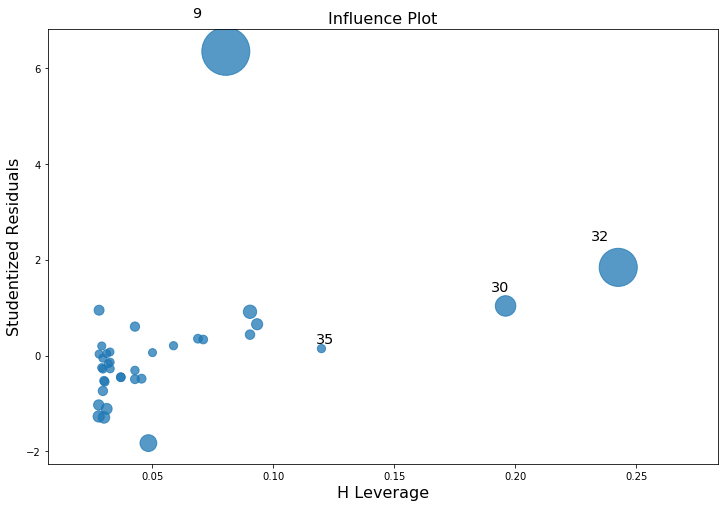

In [20]:
plt.scatter(data1.iloc[:,0], data1.iloc[:,1],label="data points")
plt.scatter(np.mean(data1.iloc[:,0]), np.mean(data1.iloc[:,1]), color = "green",label="Mean")
plt.plot(data2.iloc[:,0], data2.iloc[:,1], label = "actual")
plt.plot(data1.iloc[:,0],result.predict(sm.add_constant(data1.iloc[:,0])), label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()
fig = sm.graphics.influence_plot(result, alpha  = 0.05, criterion="cooks")

In [21]:
#(((data$X - mean(data$X))/sd(data$X))^2 +1)/36
leverage=(((data1.iloc[:,[0]]-np.mean(data1.iloc[:,[0]]))/np.std(data1.iloc[:,[0]]))**2 + 1)/data1.shape[0]

In [22]:
type(leverage)

pandas.core.frame.DataFrame

In [23]:
print(leverage.idxmax(),leverage.max())#maximum leverage index and value.
print(result.resid.idxmax(),result.resid.max())#maximum residual index and value. 

X    32
dtype: int64 X    0.242537
dtype: float64
9 458.632564234


In [24]:
#removing the maximum leverage row and highest residual row as they have impact on the model.
data3=data1.drop(data1.index[[9,32]])

In [25]:
data3.describe()

,X,Y
count,34.000000,34.000000
mean,1141.235294,1274.941176
std,139.635035,85.154740
min,750.000000,1050.000000
25%,1081.750000,1250.000000
50%,1162.500000,1275.000000
75%,1243.750000,1300.000000
max,1375.000000,1450.000000


In [26]:
data3.shape

(34, 2)

In [27]:
reg2=linear_model.LinearRegression().fit(data3.iloc[:,[0]],data3.iloc[:,[1]])

In [28]:
data3_predict_y=reg2.predict(data3.iloc[:,[0]])

In [29]:
print('Coefficients: \n',reg2.coef_)
#Mean Squared Error
print(mean_squared_error(data3.iloc[:,[1]],data3_predict_y))
#Explained Variane Score
print(r2_score(data3.iloc[:,[1]],data3_predict_y))

Coefficients: 
 [[ 0.34174308]]
4827.89765311
0.314029599955


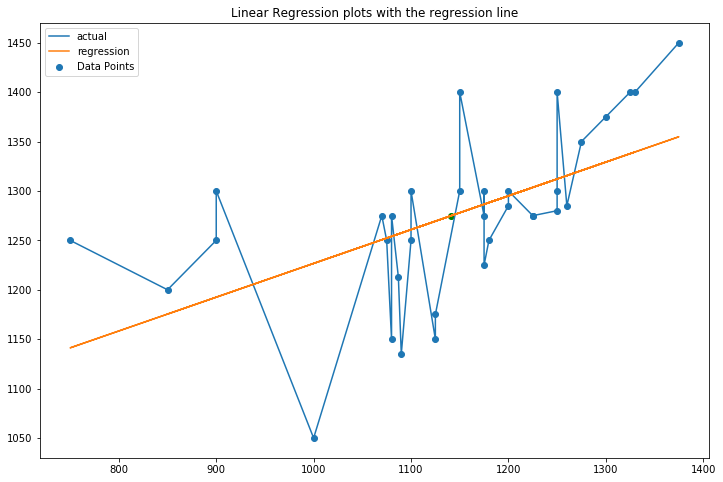

In [30]:
plt.scatter(data3.iloc[:,0],data3.iloc[:,1],label="Data Points")
plt.scatter(data3.iloc[:,0].mean(),data3.iloc[:,1].mean(),color="green")
plt.plot((data3.sort_values(by=['X']).iloc[:,0]),(data3.sort_values(by=['X']).iloc[:,1]),label="actual")
plt.plot(data3.iloc[:,0],reg2.predict(data3.iloc[:,[0]]),label="regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

In [31]:
reg3=sm.OLS(data3.iloc[:,1],sm.add_constant(data3.iloc[:,0])).fit()

In [32]:
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     14.65
Date:                Sat, 29 Sep 2018   Prob (F-statistic):           0.000567
Time:                        14:33:48   Log-Likelihood:                -192.44
No. Observations:                  34   AIC:                             388.9
Df Residuals:                      32   BIC:                             391.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        884.9319    102.636      8.622      0.000     675.869    1093.995
X              0.3417      0.089      3.827      0.001       0.160       0.524
==============================================================================
Omnibus:                        1.369   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                0.984
Skew:                          -0.414   Prob(JB):                        0.611
Kurtosis:                       2.911   Cond. No.                     9.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

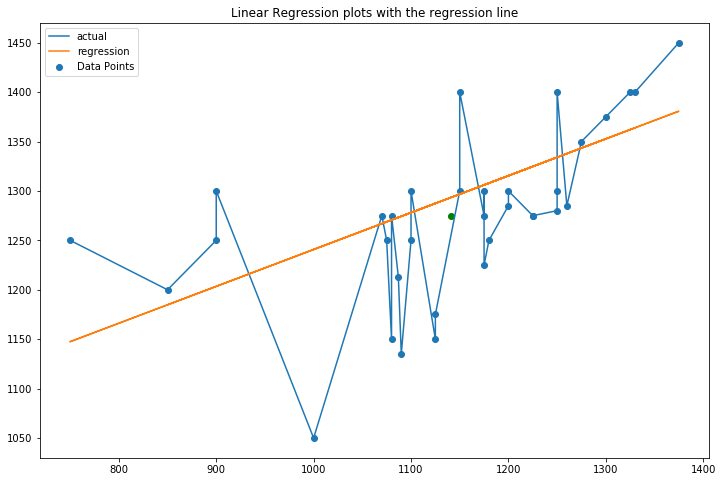

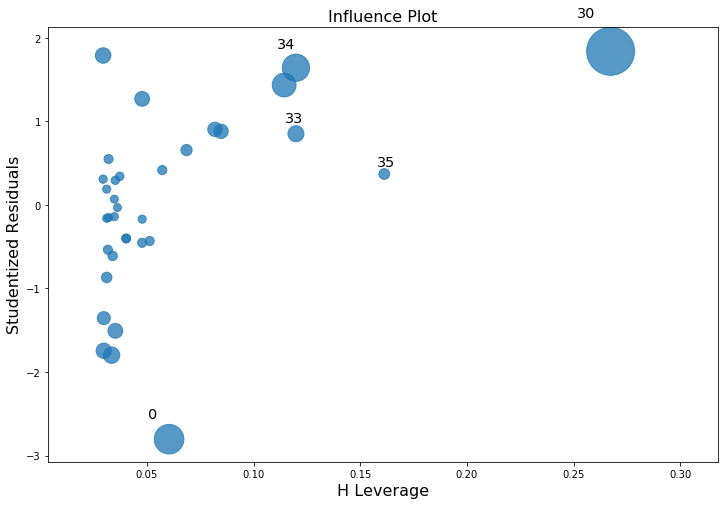

In [33]:
plt.scatter(data3.iloc[:,0], data3.iloc[:,1],label="Data Points")
plt.scatter(np.mean(data3.iloc[:,0]), np.mean(data3.iloc[:,1]), color = "green")
plt.plot(data3.sort_values(by=['X']).iloc[:,0], data3.sort_values(by=['X']).iloc[:,1], label = "actual")
plt.plot(data3.iloc[:,0],result.predict(sm.add_constant(data3.iloc[:,0])), label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()
fig = sm.graphics.influence_plot(reg3, alpha  = 0.05, criterion="cooks")

<Container object of 3 artists>

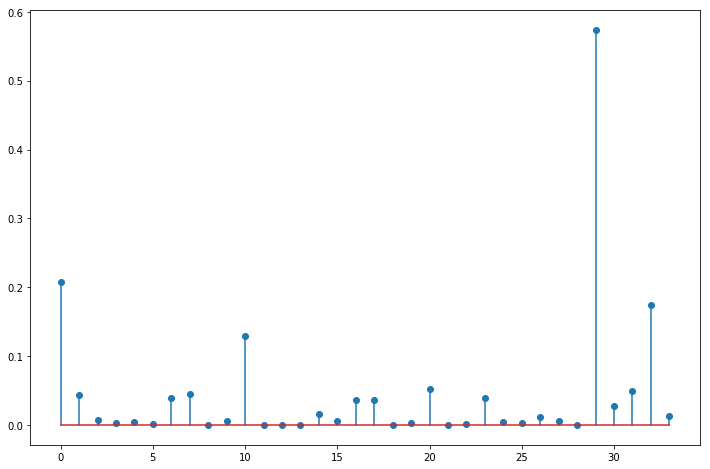

In [34]:
(c,p)=reg3.get_influence().cooks_distance
plt.stem(np.arange(len(c)),c)

In [35]:
stats.shapiro(reg3.resid)

(0.9731369614601135, 0.5530653595924377)